In [1]:
import pandas as pd

%matplotlib inline

In [2]:
import zipfile
import os
#files = zipfile.ZipFile('data.zip', 'r')
#files.extractall('Unzipped directory')
#files.close() 

In [3]:
google = pd.read_csv('data/goog.csv', index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [6]:
from pandas_datareader import data as pd_data

start  = pd.Timestamp('2010-1-1')
end    = pd.Timestamp('2014-12-31')
google = pd_data.DataReader("GOOG", 'yahoo', start, end)

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/GOOG/history?period1=1262336400&period2=1420102799&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
type(google)

In [ ]:
google.head()

In [ ]:
google.info()

In [ ]:
google['Open']

In [ ]:
google['Open'].iloc[0:5]

In [ ]:
google.loc['2010-01-04':'2010-01-08','Open']

In [ ]:
google_up = google[ google['Close'] > google['Open'] ]
google_up.head()

In [ ]:
google_filtered = google[pd.isnull(google['Volume']) == False ]
google_filtered.head()

In [ ]:
google.describe()

In [ ]:
# Compute the returns from daily percent change
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

In [ ]:
# new syntax
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

In [ ]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

In [7]:
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Check version number
pd.__version__

'1.2.4'

In [8]:
file   = "data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
             ...      
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [9]:
new_list = [5,10,15,20,25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [10]:
new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)

b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

In [11]:
from collections import OrderedDict
od = OrderedDict([('b', 100), ('a',200), ('d',450), ('c',700)])
pd.Series(od)

b    100
a    200
d    450
c    700
dtype: int64

In [39]:
import numpy as np
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=5, step=1)

In [40]:
print(series1.iloc[0])

10.0


In [41]:
index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

In [42]:
series2.loc['b']

20.0

In [43]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


In [44]:
series1.iloc[1:3]

1    20.0
2    30.0
dtype: float64

In [45]:
print( series2.iloc[1:2]     ) 
print("\n")
print( series2.loc['b':'c'] )

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [46]:
series2.iloc[-1:]

a    50.0
dtype: float64

In [47]:
series2.iloc[:-3]

a    10.0
b    20.0
dtype: float64

In [48]:
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

In [49]:
series2.loc['d':]

d    40.0
a    50.0
dtype: float64

In [23]:
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


In [24]:
series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [25]:
series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
          ...     
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


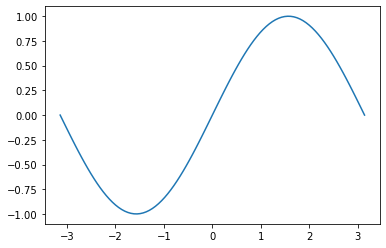

In [26]:
plt.plot(series_2pi, series_sin)

In [27]:
series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [51]:
series2

c    10
d    20
e    30
f    40
g    50
dtype: int64

In [50]:
series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [53]:
#pd.concat([series1,series2],join='inner')
pd.concat([series1,series2],axis=1)

,0,1
a,1.0,NaN
b,2.0,NaN
c,3.0,10.0
d,4.0,20.0
e,5.0,30.0
f,NaN,40.0
g,NaN,50.0


In [54]:
(series1 + series2).mean()

24.0

In [55]:
print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


In [56]:
file    = "data/exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [57]:
dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [58]:
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

In [60]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [61]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.269955,0.438544
Feb,2,0.613694,0.811437
Mar,3,0.794218,0.534472
Apr,4,0.749046,0.851329
May,5,0.474093,0.367750


In [62]:
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )

Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>


In [63]:
df_grades['Alice'].iloc[1]

2

In [64]:
df_grades.loc['Jan','Alice']

1

In [65]:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)

Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5


In [66]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])

Index: Jan , Row: 1.0
Index: Feb , Row: 2.0
Index: Mar , Row: 3.0
Index: Apr , Row: 4.0
Index: May , Row: 5.0
